<a href="https://www.kaggle.com/code/niramay/attrition-prediction-cba?scriptVersionId=113203225" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
all_data = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
all_data.shape

(1470, 35)

target variable - Attrition


categoricals - BusinessTravel, Department, Education, EducationField, EmployeeSatisfaction, Gender, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, Over18, OverTime, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, WorkLifeBalance.

In [3]:
# Checking for missing values

all_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


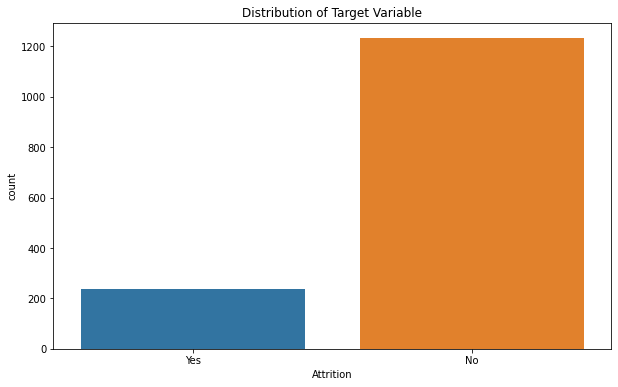

In [4]:
# Checking the target variable distribution

plt.figure(figsize = (10,6))
sns.countplot('Attrition',data=all_data).set_title('Distribution of Target Variable')
plt.show()

In [5]:
# checking the values of all the features using value counts

categoricals = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

for feature in categoricals:
    print(f"Values Counts for [{feature}]")
    print(all_data[feature].value_counts())
    print("\n\n")


Values Counts for [BusinessTravel]
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64



Values Counts for [Department]
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64



Values Counts for [Education]
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64



Values Counts for [EducationField]
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64



Values Counts for [EnvironmentSatisfaction]
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64



Values Counts for [Gender]
Male      882
Female    588
Name: Gender, dtype: int64



Values Counts for [JobInvolvement]
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64



Values Counts for [JobLevel]
1    543
2    534
3

Categorical variables that are Binary- Gender, Over18, OverTime, PerformanceRating.

Performance Rating has only two values- 3 & 4. We can modify the values such that 0 replaces 3 and 1 replaces 4.

The number of data points are 1470 and the Over18 column has all values as Y. So we can drop that column

Attrition feature also needs to be binarised.

In [6]:
all_data['OverTime'] = all_data['OverTime'].map({'Yes': 1, 'No': 0})
all_data['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [7]:
all_data['Gender'] = all_data['Gender'].map({'Male': 1, 'Female': 0})
all_data['Gender'].value_counts()

1    882
0    588
Name: Gender, dtype: int64

In [8]:
all_data['PerformanceRating'] = all_data['PerformanceRating'].map({3: 0, 4: 1})
all_data['PerformanceRating'].value_counts()

0    1244
1     226
Name: PerformanceRating, dtype: int64

In [9]:
all_data = all_data.drop(['Over18'],axis=1)

In [10]:
all_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
all_data['Attrition'] = all_data['Attrition'].map({'No': 0, 'Yes': 1})
all_data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [12]:
all_data.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
Gender                      0.029453
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
E

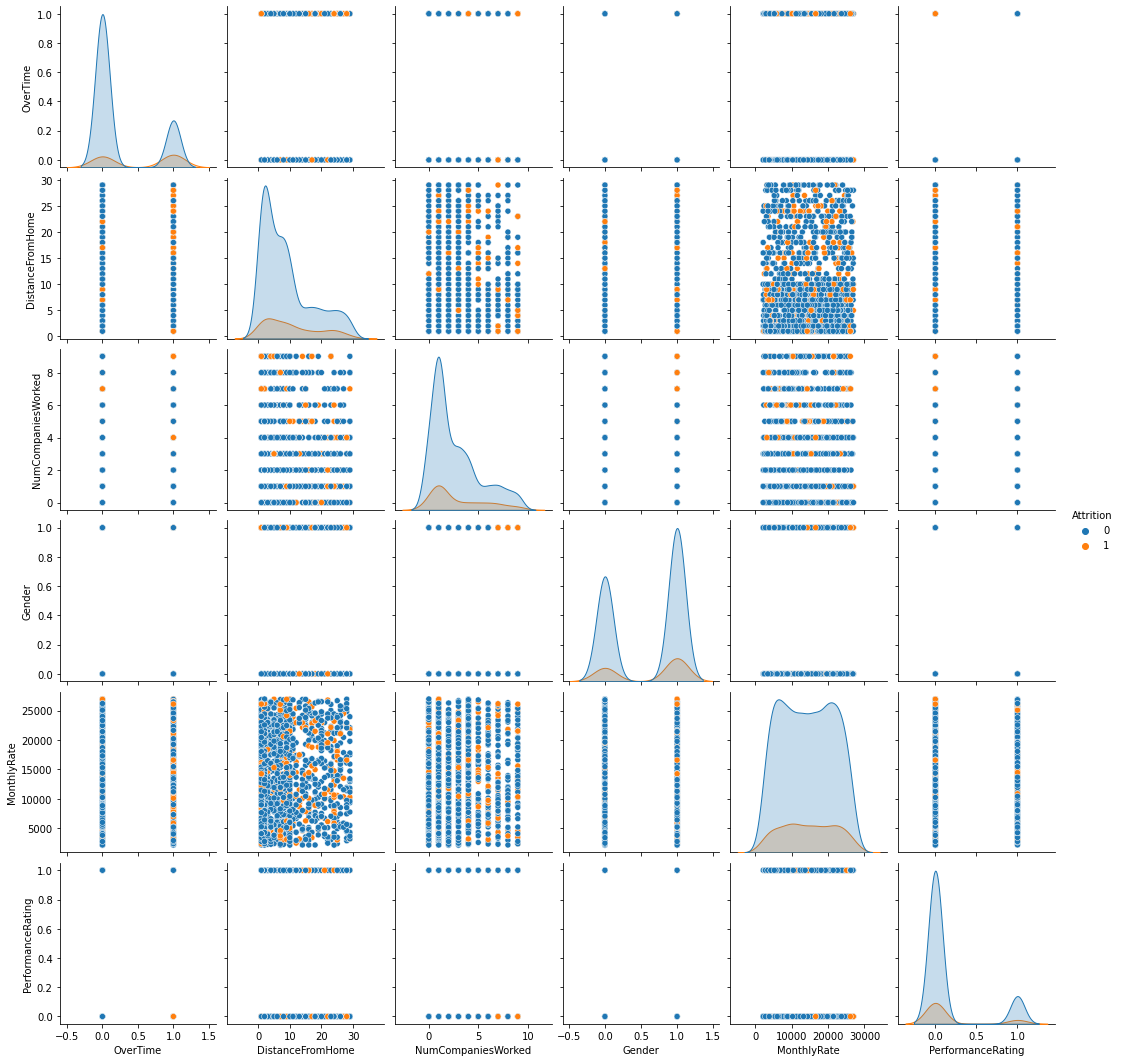

In [13]:
high_corr = ['Attrition','OverTime','DistanceFromHome','NumCompaniesWorked','Gender','MonthlyRate','PerformanceRating']
sns.pairplot(all_data[high_corr],hue='Attrition')

Nominal Categorical Variables that need to be dummy encoded-BusinessTravel, Department, EducationField, JobRole, MaritalStatus

Ordinal Categoricals do not need to be dummy encoded since we would lose the ordered nature of the variables which is important in this case. We assume that the differences in levels are more or less similar and that we can treat them as continuous.

In [14]:
nominals = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
all_data_ohe = pd.get_dummies(all_data, columns = nominals)
all_data_ohe

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,...,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,1,2062,4,1,42,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,1,2064,2,1,87,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,1,2065,4,1,63,...,0,0,0,0,0,1,0,0,1,0


In [15]:
scaler = MinMaxScaler()
model=scaler.fit(all_data_ohe)
scaled=model.transform(all_data_ohe)

all_data_scaled = pd.DataFrame(scaled, index=all_data_ohe.index, columns=all_data_ohe.columns)
all_data_scaled.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,1.0,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.0,0.914286,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.738095,0.0,0.126700,0.250000,0.00,0.0,0.000484,0.666667,1.0,0.442857,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,1.0,0.909807,0.035714,0.25,0.0,0.001451,1.000000,1.0,0.885714,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.0,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0.0,0.371429,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.0,0.350036,0.035714,0.00,0.0,0.002903,0.000000,1.0,0.142857,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
X = all_data_scaled.drop(['Attrition'],axis=1)
y = all_data_scaled['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1029, 52), (441, 52), (1029,), (441,))

In [17]:
model = Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25,activation='relu',))
model.add(Dropout(0.5))
model.add(Dense(1))

# model.compile(optimizer='adam',loss='mse')
model.compile(loss='binary_crossentropy', optimizer='adam')

2022-12-07 14:53:57.206500: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

2022-12-07 14:53:57.410085: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/400
9/9 [==============================] - 1s 35ms/step - loss: 1.7729 - val_loss: 2.4727
Epoch 2/400
9/9 [==============================] - 0s 9ms/step - loss: 1.8443 - val_loss: 2.2446
Epoch 3/400
9/9 [==============================] - 0s 8ms/step - loss: 1.7066 - val_loss: 1.6849
Epoch 4/400
9/9 [==============================] - 0s 9ms/step - loss: 1.5526 - val_loss: 1.1259
Epoch 5/400
9/9 [==============================] - 0s 9ms/step - loss: 1.4411 - val_loss: 0.8350
Epoch 6/400
9/9 [==============================] - 0s 8ms/step - loss: 1.3382 - val_loss: 0.6147
Epoch 7/400
9/9 [==============================] - 0s 9ms/step - loss: 1.2832 - val_loss: 0.4685
Epoch 8/400
9/9 [==============================] - 0s 9ms/step - loss: 1.0946 - val_loss: 0.4562
Epoch 9/400
9/9 [==============================] - 0s 9ms/step - loss: 1.1000 - val_loss: 0.4521
Epoch 10/400
9/9 [==============================] - 0s 8ms/step - loss: 0.9559 - val_loss: 0.4520
Epoch 11/400
9/9 [==========

<AxesSubplot:>

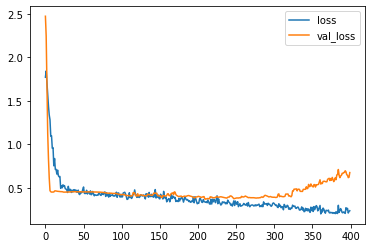

In [19]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [20]:
y_pred = model.predict(X_test)


# METRICS 
print('MAE: ', mean_absolute_error(y_test,y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('Variance explained: ',explained_variance_score(y_test,y_pred))

MAE:  0.25006219982898154
RMSE:  0.39445628882389366
Variance explained:  -0.0472741210921972


In [21]:
# EARLY STOPPING TO PREVENT OVERFITTING
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [22]:
model.fit(x=X_train, 
          y=y_train, 
          batch_size=128,
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
               )

Epoch 1/100
9/9 [==============================] - 1s 30ms/step - loss: 0.2244 - val_loss: 0.6792
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 0.2372 - val_loss: 0.6832
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.2668 - val_loss: 0.6819
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 0.2709 - val_loss: 0.6859
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 0.2276 - val_loss: 0.7074
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 0.2693 - val_loss: 0.7104
Epoch 00006: early stopping


<AxesSubplot:>

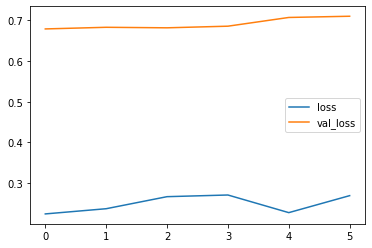

In [23]:
losses_earlystopp = pd.DataFrame(model.history.history)
losses_earlystopp.plot()

In [24]:
y_pred =(model.predict(X_test) > 0.5).astype("int32")

In [25]:
# CLASSIFICATION REPORT
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       364
         1.0       0.60      0.35      0.44        77

    accuracy                           0.85       441
   macro avg       0.74      0.65      0.68       441
weighted avg       0.83      0.85      0.83       441



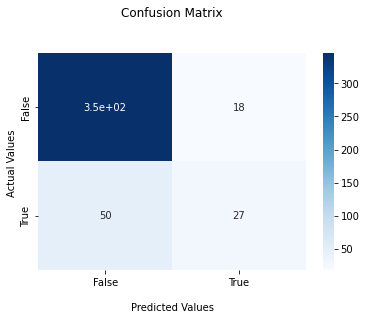

In [26]:
# PRINTING THE CONFUSION MATRIX
confusion_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()


In [27]:
print('ROC AUC: ', roc_auc_score(y_test,model.predict(X_test)))

ROC AUC:  0.7837162837162838
